# Detailed Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sweetviz as sv
from scipy import stats
import seaborn as sns

In [2]:
test_cs = pd.read_csv('test_data.csv')
train_cs = pd.read_csv('train_data.csv')

In [3]:
train_cs

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0,tcp,exec,RSTO,0,0,0,0,0,0,...,7,0.03,0.06,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
25188,0,tcp,ftp_data,SF,334,0,0,0,0,0,...,39,1.00,0.00,1.00,0.18,0.00,0.00,0.00,0.00,anomaly
25189,0,tcp,private,REJ,0,0,0,0,0,0,...,13,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
25190,0,tcp,nnsp,S0,0,0,0,0,0,0,...,20,0.08,0.06,0.00,0.00,1.00,1.00,0.00,0.00,anomaly


In [4]:
train_cs.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,...,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,...,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
train_cs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [6]:
#demotrain = sv.analyze(train_cs)
#demotrain.show_html()

In [7]:
train_cs.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [8]:
train_cs.duplicated().sum()

0

<AxesSubplot:xlabel='class', ylabel='count'>

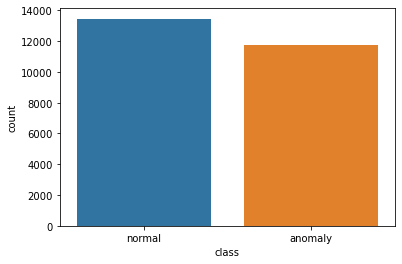

In [9]:
sns.countplot(data=train_cs, x='class')

In [10]:
(train_cs['class'].values == 'anomaly').sum()

11743

<AxesSubplot:xlabel='protocol_type', ylabel='count'>

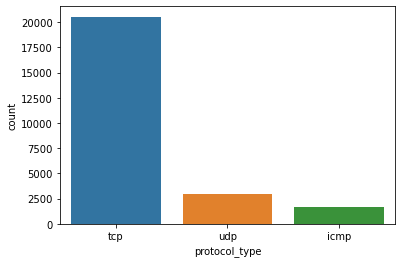

In [11]:
sns.countplot(data=train_cs, x='protocol_type')

In [12]:
train_cs['service'].unique()

array(['ftp_data', 'other', 'private', 'http', 'remote_job', 'name',
       'netbios_ns', 'eco_i', 'mtp', 'telnet', 'finger', 'domain_u',
       'supdup', 'uucp_path', 'Z39_50', 'smtp', 'csnet_ns', 'uucp',
       'netbios_dgm', 'urp_i', 'auth', 'domain', 'ftp', 'bgp', 'ldap',
       'ecr_i', 'gopher', 'vmnet', 'systat', 'http_443', 'efs', 'whois',
       'imap4', 'iso_tsap', 'echo', 'klogin', 'link', 'sunrpc', 'login',
       'kshell', 'sql_net', 'time', 'hostnames', 'exec', 'ntp_u',
       'discard', 'nntp', 'courier', 'ctf', 'ssh', 'daytime', 'shell',
       'netstat', 'pop_3', 'nnsp', 'IRC', 'pop_2', 'printer', 'tim_i',
       'pm_dump', 'red_i', 'netbios_ssn', 'rje', 'X11', 'urh_i',
       'http_8001'], dtype=object)

<AxesSubplot:xlabel='flag', ylabel='count'>

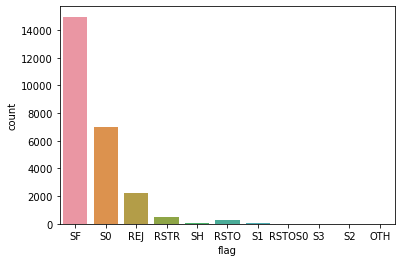

In [13]:
sns.countplot(data=train_cs, x='flag')

In [14]:
nor_data = train_cs.loc[train_cs['class'] == 'normal']

In [15]:
nor_data #normal data distribution

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
12,0,tcp,http,SF,287,2251,0,0,0,0,...,219,1.00,0.00,0.12,0.03,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25176,0,tcp,ftp_data,SF,748,0,0,0,0,0,...,27,0.12,0.07,0.12,0.07,0.00,0.00,0.00,0.00,normal
25177,0,tcp,http,SF,293,2486,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
25184,29,tcp,ftp,SF,329,1063,0,0,0,6,...,60,0.24,0.02,0.00,0.00,0.00,0.00,0.03,0.10,normal
25185,1,tcp,smtp,SF,2896,333,0,0,0,0,...,11,0.92,0.17,0.08,0.00,0.00,0.00,0.00,0.00,normal


In [16]:
ano_data = train_cs.loc[train_cs['class'] == 'anomaly']

In [17]:
ano_data #anomaly data distribution

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.0,1.0,0.0,0.0,anomaly
5,0,tcp,private,REJ,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.0,0.0,1.0,1.0,anomaly
6,0,tcp,private,S0,0,0,0,0,0,0,...,9,0.04,0.05,0.00,0.00,1.0,1.0,0.0,0.0,anomaly
7,0,tcp,private,S0,0,0,0,0,0,0,...,15,0.06,0.07,0.00,0.00,1.0,1.0,0.0,0.0,anomaly
8,0,tcp,remote_job,S0,0,0,0,0,0,0,...,23,0.09,0.05,0.00,0.00,1.0,1.0,0.0,0.0,anomaly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0,tcp,exec,RSTO,0,0,0,0,0,0,...,7,0.03,0.06,0.00,0.00,0.0,0.0,1.0,1.0,anomaly
25188,0,tcp,ftp_data,SF,334,0,0,0,0,0,...,39,1.00,0.00,1.00,0.18,0.0,0.0,0.0,0.0,anomaly
25189,0,tcp,private,REJ,0,0,0,0,0,0,...,13,0.05,0.07,0.00,0.00,0.0,0.0,1.0,1.0,anomaly
25190,0,tcp,nnsp,S0,0,0,0,0,0,0,...,20,0.08,0.06,0.00,0.00,1.0,1.0,0.0,0.0,anomaly


<AxesSubplot:xlabel='protocol_type', ylabel='count'>

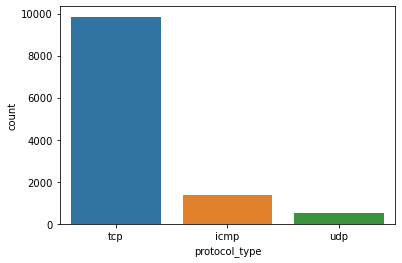

In [18]:
sns.countplot(data=ano_data, x='protocol_type')

In anomaly data tcp and icmp protocols have higher usages

<AxesSubplot:xlabel='protocol_type', ylabel='count'>

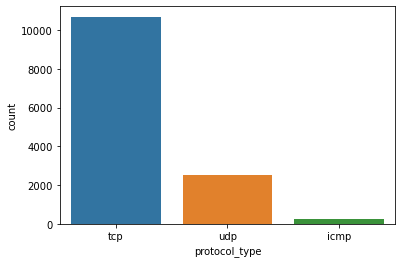

In [19]:
sns.countplot(data=nor_data, x='protocol_type')

In normal distribution tcp and udp protocols have higher usage

<AxesSubplot:xlabel='flag', ylabel='count'>

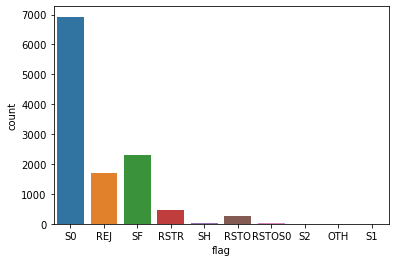

In [20]:
sns.countplot(data=ano_data, x='flag')

<AxesSubplot:xlabel='flag', ylabel='count'>

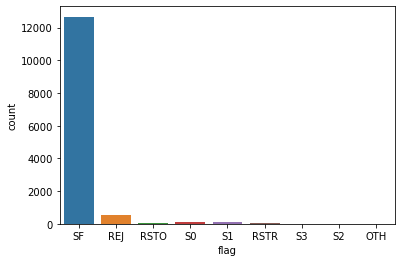

In [21]:
sns.countplot(data=nor_data, x='flag')

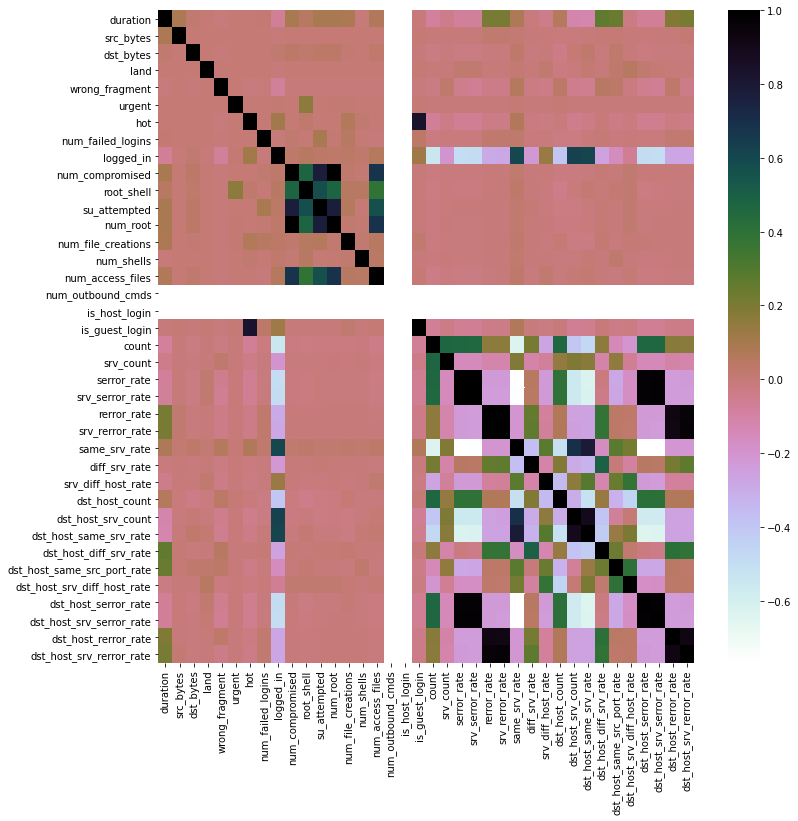

In [22]:
corr = train_cs.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr, cmap='cubehelix_r');

In [23]:
train_cs.drop(['num_outbound_cmds', 'is_host_login'], axis=1, inplace=True)
test_cs.drop(['num_outbound_cmds', 'is_host_login'], axis=1, inplace=True)

# Separating numerical and object columns

Combining all Numerical Columns 

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

cols = train_cs.select_dtypes(include=['float64','int64']).columns
sc_train = scaler.fit_transform(train_cs.select_dtypes(include=['float64','int64']))
sc_test = scaler.fit_transform(test_cs.select_dtypes(include=['float64','int64']))

train_num = pd.DataFrame(sc_train, columns = cols)
test_num = pd.DataFrame(sc_test, columns = cols)

Finding Object type Columns

In [25]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

# extract object attributes from both train and test sets 
train_obj = train_cs.select_dtypes(include=['object']).copy()
test_obj = test_cs.select_dtypes(include=['object']).copy()

# encode the object attributes
train_a = train_obj.apply(encoder.fit_transform)
test_a = test_obj.apply(encoder.fit_transform)

# separate 'class' column from encoded data 
train_noclass = train_a.drop(['class'], axis=1)
Ytrain_class = train_a[['class']].copy()

In [26]:
train_x = pd.concat([train_num,train_noclass],axis=1)
train_y = train_cs['class']
train_x.shape

(25192, 39)

In [27]:
test_ = pd.concat([test_num,test_a],axis=1)
test_.shape

(22544, 39)

# Feature Selection

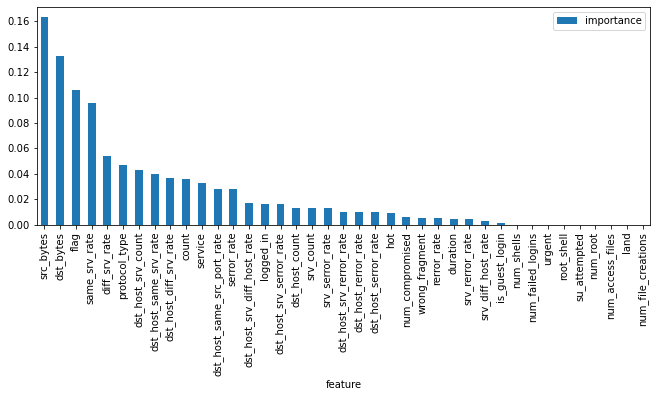

In [28]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier();

# fit random forest classifier on the training set
rfc.fit(train_x, train_y);

# extract important features
score = np.round(rfc.feature_importances_,3)
imp = pd.DataFrame({'feature':train_x.columns,'importance':score})
imp = imp.sort_values('importance',ascending=False).set_index('feature')

# plot importances
plt.rcParams['figure.figsize'] = (11, 4)
imp.plot.bar();

In [53]:
from sklearn.feature_selection import RFE
import itertools
rfc = RandomForestClassifier()

# create the RFE model and select 15 attributes
rfe = RFE(rfc, n_features_to_select=15)
rfe = rfe.fit(train_x, train_y)

# summarize the selection of the attributes
feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), train_x.columns)]
features = [v for i, v in feature_map if i==True]

features

['src_bytes',
 'dst_bytes',
 'logged_in',
 'count',
 'srv_count',
 'same_srv_rate',
 'diff_srv_rate',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'protocol_type',
 'service',
 'flag']

In [54]:
train_feature = train_x[features]
train_feature

,src_bytes,dst_bytes,logged_in,count,srv_count,same_srv_rate,diff_srv_rate,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,protocol_type,service,flag
0,-0.009889,-0.039310,-0.807626,-0.720244,-0.354628,0.772109,-0.349282,-0.813985,-0.779157,-0.280673,0.073120,-0.287993,1,19,9
1,-0.010032,-0.039310,-0.807626,-0.624317,-0.368427,-1.320567,0.490836,-1.030895,-1.157831,2.764403,2.375620,-0.287993,2,41,9
2,-0.010093,-0.039310,-0.807626,0.334947,-0.299430,-1.388806,0.042773,-0.804947,-0.935081,-0.173828,-0.478183,-0.287993,1,46,5
3,-0.009996,0.052473,1.238197,-0.694082,-0.313230,0.772109,-0.349282,1.264742,1.069663,-0.440940,-0.380894,0.073759,1,22,9
4,-0.010010,-0.034582,1.238197,-0.476067,0.059355,0.772109,-0.349282,1.264742,1.069663,-0.440940,-0.478183,-0.287993,1,22,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,-0.010093,-0.039310,-0.807626,0.134374,-0.285631,-1.343313,0.042773,-0.976667,-1.091006,-0.120406,-0.478183,-0.287993,1,16,2
25188,-0.009954,-0.039310,1.238197,-0.728964,-0.368427,0.772109,-0.349282,-0.687453,1.069663,-0.440940,2.764775,1.339894,1,19,9
25189,-0.010093,-0.039310,-0.807626,0.177977,-0.285631,-1.343313,0.042773,-0.922440,-1.046456,-0.066984,-0.478183,-0.287993,1,46,1
25190,-0.010093,-0.039310,-0.807626,0.387271,-0.133837,-1.184088,-0.013235,-0.859174,-0.979631,-0.120406,-0.478183,-0.287993,1,38,5


Defining Train and Test

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(train_feature, train_y, test_size = 0.25, random_state=2)

# Applying Logistic Regression

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [57]:
LGR_Classifier = LogisticRegression(n_jobs=-1, random_state=0)
LGR_Classifier.fit(X_train, Y_train);

Evaluating Model

In [58]:
models = []
models.append(('LogisticRegression', LGR_Classifier))

for i, v in models:
    scores = cross_val_score(v, X_train, Y_train, cv=10)
    accuracy = metrics.accuracy_score(Y_train, v.predict(X_train))
    confusion_matrix = metrics.confusion_matrix(Y_train, v.predict(X_train))
    classification = metrics.classification_report(Y_train, v.predict(X_train))
    print()
    print('============================== {} Model Evaluation =============================='.format(i))
    print()
    print ("Cross Validation Mean Score:" "\n", scores.mean())
    print()
    print ("Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification) 
    print()


============================== LogisticRegression Model Evaluation ==============================

Cross Validation Mean Score:
 0.943632391371936

Model Accuracy:
 0.9439504604636393

Confusion matrix:
 [[8162  652]
 [ 407 9673]]

Classification report:
               precision    recall  f1-score   support

     anomaly       0.95      0.93      0.94      8814
      normal       0.94      0.96      0.95     10080

    accuracy                           0.94     18894
   macro avg       0.94      0.94      0.94     18894
weighted avg       0.94      0.94      0.94     18894




Validating Model

In [59]:
for i, v in models:
    accuracy = metrics.accuracy_score(Y_test, v.predict(X_test))
    confusion_matrix = metrics.confusion_matrix(Y_test, v.predict(X_test))
    classification = metrics.classification_report(Y_test, v.predict(X_test))
    print()
    print('============================== {} Model Test Results =============================='.format(i))
    print()
    print ("Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification) 
    print() 


============================== LogisticRegression Model Test Results ==============================

Model Accuracy:
 0.9402985074626866

Confusion matrix:
 [[2703  226]
 [ 150 3219]]

Classification report:
               precision    recall  f1-score   support

     anomaly       0.95      0.92      0.93      2929
      normal       0.93      0.96      0.94      3369

    accuracy                           0.94      6298
   macro avg       0.94      0.94      0.94      6298
weighted avg       0.94      0.94      0.94      6298




Another approach to improve model's accuracy rate

In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(train_x, train_y, test_size = 0.25, random_state=2)

In [61]:
LGR_Classifier = LogisticRegression(n_jobs=-1, random_state=0)
LGR_Classifier.fit(X_train, Y_train);

Evaluation Model

In [62]:
models = []
models.append(('LogisticRegression', LGR_Classifier))

for i, v in models:
    scores = cross_val_score(v, X_train, Y_train, cv=10)
    accuracy = metrics.accuracy_score(Y_train, v.predict(X_train))
    confusion_matrix = metrics.confusion_matrix(Y_train, v.predict(X_train))
    classification = metrics.classification_report(Y_train, v.predict(X_train))
    print()
    print('============================== {} Model Evaluation =============================='.format(i))
    print()
    print ("Cross Validation Mean Score:" "\n", scores.mean())
    print()
    print ("Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification) 
    print()


============================== LogisticRegression Model Evaluation ==============================

Cross Validation Mean Score:
 0.9547470036776546

Model Accuracy:
 0.9556472954377051

Confusion matrix:
 [[8298  516]
 [ 322 9758]]

Classification report:
               precision    recall  f1-score   support

     anomaly       0.96      0.94      0.95      8814
      normal       0.95      0.97      0.96     10080

    accuracy                           0.96     18894
   macro avg       0.96      0.95      0.96     18894
weighted avg       0.96      0.96      0.96     18894




Validation Model

In [63]:
for i, v in models:
    accuracy = metrics.accuracy_score(Y_test, v.predict(X_test))
    confusion_matrix = metrics.confusion_matrix(Y_test, v.predict(X_test))
    classification = metrics.classification_report(Y_test, v.predict(X_test))
    print()
    print('============================== {} Model Test Results =============================='.format(i))
    print()
    print ("Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification) 
    print() 


============================== LogisticRegression Model Test Results ==============================

Model Accuracy:
 0.9537948555096856

Confusion matrix:
 [[2754  175]
 [ 116 3253]]

Classification report:
               precision    recall  f1-score   support

     anomaly       0.96      0.94      0.95      2929
      normal       0.95      0.97      0.96      3369

    accuracy                           0.95      6298
   macro avg       0.95      0.95      0.95      6298
weighted avg       0.95      0.95      0.95      6298




# Predicting normal and anamoly behaviour on Test dataset

In [64]:
pred_log = LGR_Classifier.predict(test_)

In [65]:
pred_log

array(['anomaly', 'anomaly', 'normal', ..., 'normal', 'normal', 'anomaly'],
      dtype=object)

In [70]:
test_cs

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,tcp,private,REJ,0,0,0,0,0,0,...,255,10,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00
1,0,tcp,private,REJ,0,0,0,0,0,0,...,255,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,134,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,3,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,29,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,tcp,smtp,SF,794,333,0,0,0,0,...,100,141,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00
22540,0,tcp,http,SF,317,938,0,0,0,0,...,197,255,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00
22541,0,tcp,http,SF,54540,8314,0,0,0,2,...,255,255,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07
22542,0,udp,domain_u,SF,42,42,0,0,0,0,...,255,252,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00


In [71]:
pred_df = pd.DataFrame(pred_log, columns = ['class']) 
test_output = pd.concat([test_cs, pred_df],axis=1)

In [72]:
test_output

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,private,REJ,0,0,0,0,0,0,...,10,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,anomaly
1,0,tcp,private,REJ,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,anomaly
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,anomaly
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,tcp,smtp,SF,794,333,0,0,0,0,...,141,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,normal
22540,0,tcp,http,SF,317,938,0,0,0,0,...,255,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,normal
22541,0,tcp,http,SF,54540,8314,0,0,0,2,...,255,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,normal
22542,0,udp,domain_u,SF,42,42,0,0,0,0,...,252,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,normal


<AxesSubplot:xlabel='class', ylabel='count'>

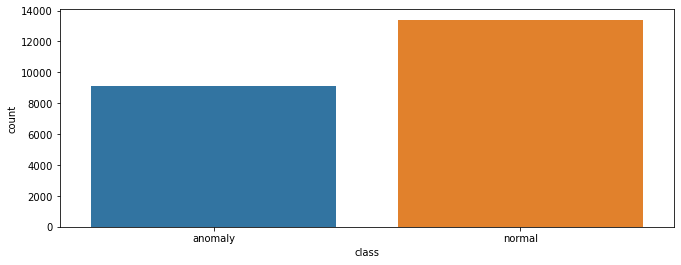

In [73]:
sns.countplot(data = test_output, x = 'class')